In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
# the following line has been changed
from sklearn.model_selection import train_test_split # import from model_selection instead of cross_validation
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_excel('Patrick Sheet.Dataa.xlsx', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1000, 18)
['Age', 'Gender', 'Grade', 'ParentED', 'ParentOc', 'Resident', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']


In [3]:
data.head()

,Age,Gender,Grade,ParentED,ParentOc,Resident,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,4,1,3,1,5,1,0,1,0,1,1,1,1,0,1,4,2,1
1,4,1,3,2,2,1,0,1,0,1,1,1,1,0,1,3,3,1
2,4,0,3,3,2,1,0,1,0,1,1,1,1,0,1,4,2,1
3,4,1,3,5,3,1,1,1,0,1,1,1,1,0,1,4,2,1
4,4,1,3,3,1,0,0,1,0,0,1,1,1,0,1,4,2,1


In [4]:
cols=[ 'Gender', 'ParentED', 'Resident', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
X=data[cols]
y=data['B12']

In [5]:
import statsmodels.api as sm
X = sm.add_constant(X)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.326265
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    B12   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      985
Method:                           MLE   Df Model:                           14
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                 0.02878
Time:                        12:26:54   Log-Likelihood:                -326.27
converged:                      False   LL-Null:                       -335.93
Covariance Type:            nonrobust   LLR p-value:                    0.1526
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0297   1.41e+04      0.001      0.999   -2.77e+04    2.77e+04
Gender         0.1016      0.217      0.469      0.639      -0.32

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=7) # Use KFold directly since it was imported from sklearn.model_selection
modelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring) # Use cross_val_score directly since it was imported from sklearn.model_selection
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.893


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0  30]
 [  0 270]]


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.90      1.00      0.95       270

    accuracy                           0.90       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.81      0.90      0.85       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.90      1.00      0.95       270

    accuracy                           0.90       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.81      0.90      0.85       300

Accuracy: 0.90
Recall (Sensitivity): 1.00
Specificity: 0.00
Precision: 0.90
Negative Predictive Value (NPV): nan
F1-Score: 0.95
Cohen's Kappa: 0.00
ROC AUC: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-13-7ecd949dcf26>:25: RuntimeWarnin

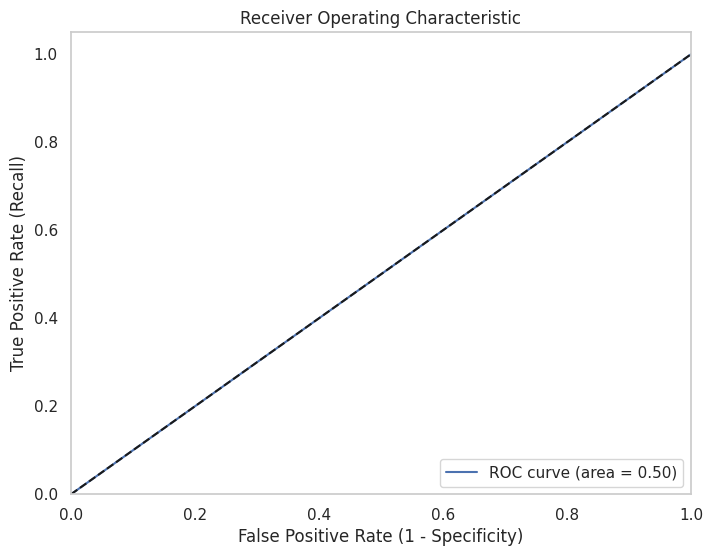

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, cohen_kappa_score
import numpy as np

# Get the classification report (includes precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix: to compute specificity, NPV
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Recall (Sensitivity or True Positive Rate)
recall = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Precision (Positive Predictive Value)
precision = tp / (tp + fp)

# Negative Predictive Value (NPV)
npv = tn / (tn + fn)

# F1-Score (Harmonic mean of precision and recall)
f1_score = 2 * (precision * recall) / (precision + recall)

# Cohen's Kappa (Agreement between actual and predicted)
kappa = cohen_kappa_score(y_test, y_pred)

# ROC AUC (Area under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the calculated metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Negative Predictive Value (NPV): {npv:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"Cohen's Kappa: {kappa:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# ROC Curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

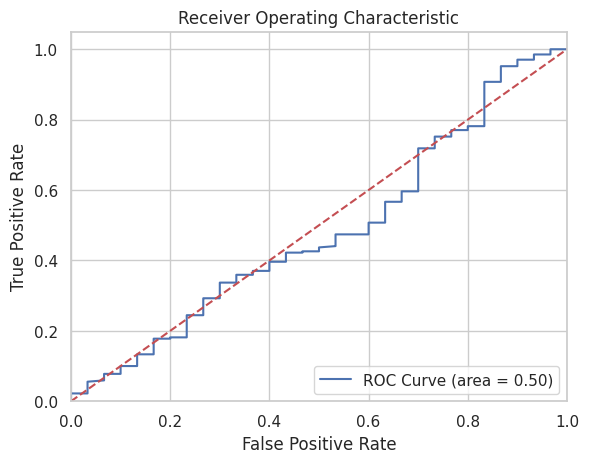

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt # Make sure to import matplotlib

# Assuming X_train and y_train are your training data
logreg.fit(X_train, y_train) # Fit the model to your training data

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

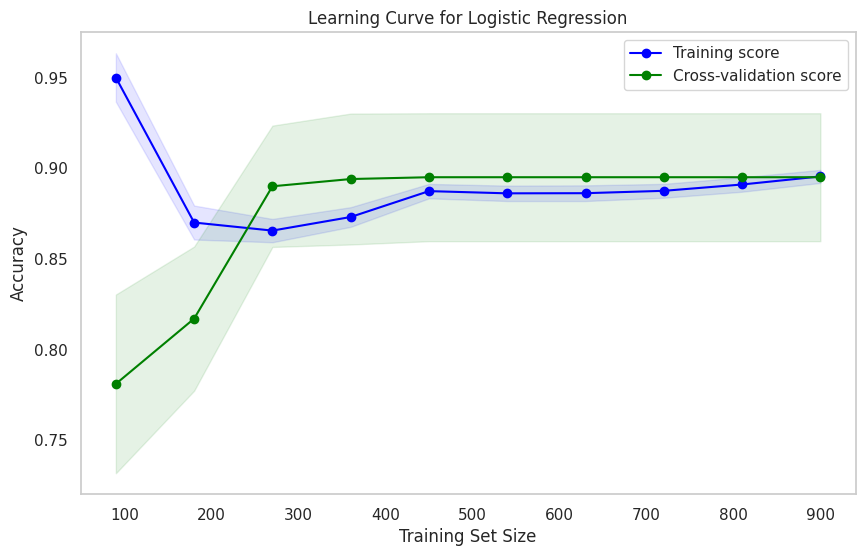

In [ ]:
# Plot learning curve to check for overfitting or underfitting
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=10, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    # Mean and standard deviation of training and validation (test) scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve for training scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")

    # Plot learning curve for validation scores
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="green")

    # Labels, title, and legend
    plt.title('Learning Curve for Logistic Regression')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.grid()

    plt.show()

# Initialize and plot the learning curve
logreg = LogisticRegression(max_iter=1000)
plot_learning_curve(logreg, X, y, cv=kfold)

In [ ]:
# 1. Hosmer-Lemeshow Test
!pip install statsmodels
import statsmodels.api as sm

def hosmer_lemeshow_test(model, y, X):
    hl_test = sm.stats.Table2x2(model.pred_table()).homogeneity() # Added parenthesis after homogeneity
    return hl_test

hl_test = hosmer_lemeshow_test(result, y_test, X_test)
print(f"Hosmer-Lemeshow test statistic: {hl_test.statistic:.4f}, p-value: {hl_test.pvalue:.4f}")

Hosmer-Lemeshow test statistic: 101.5097, p-value: 0.0000


In [ ]:
# 2. Likelihood Ratio Test
null_model = sm.Logit(y_train, np.ones((len(y_train), 1))).fit(disp=0)
lr_stat = 2 * (result.llf - null_model.llf)
from scipy import stats # import the stats module from scipy
lr_pvalue = stats.chi2.sf(lr_stat, df=len(result.params) - 1)
print(f"Likelihood ratio test statistic: {lr_stat:.4f}, p-value: {lr_pvalue:.4f}")

Likelihood ratio test statistic: -175.8312, p-value: 1.0000


In [ ]:
# 3. Pearson Residuals
pearson_resid = (y_test - result.predict(X_test)) / np.sqrt(result.predict(X_test) * (1 - result.predict(X_test))) # Use X_test for prediction to get predictions for the test set
print(f"Pearson residuals: \n{pearson_resid[:10]}")  # Printing first 10 residuals

Pearson residuals: 
993    0.376607
859    0.363715
298    0.300101
553    0.339815
672    0.443607
971    0.394452
27    -1.380034
231    0.255121
306    0.377811
706    0.369060
dtype: float64


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.32718381428027554
            Iterations: 228
            Function evaluations: 229
            Gradient evaluations: 228


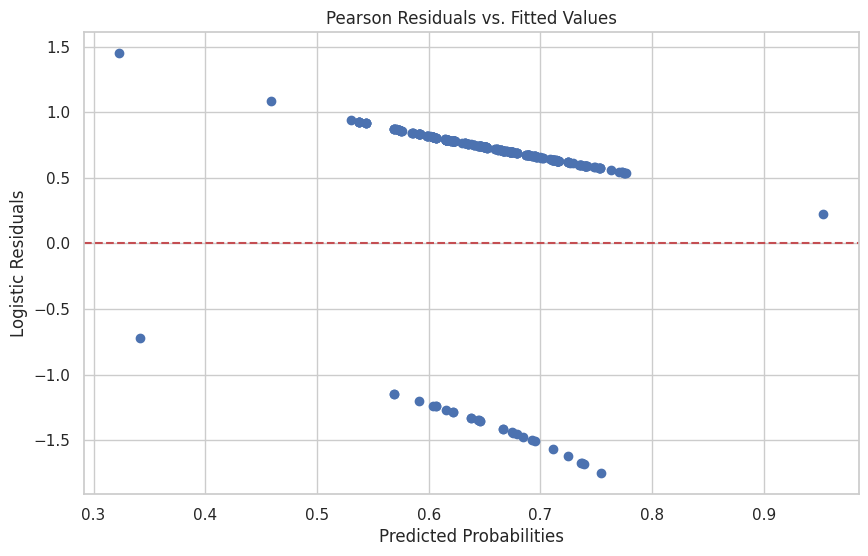

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm # Import statsmodels
import pandas as pd # Import pandas for handling DataFrames

# Assuming 'result' is your OptimizeResult object and 'result.x' contains the optimized parameters
# Assuming you used statsmodels for logistic regression
# Create a new Logit model instance with the optimized parameters
fitted_model = sm.Logit(y_train, X_train) # Create Logit model instance

# Apply regularization with a small alpha value to address multicollinearity
# Replace 'alpha=0.01' with a suitable value for your data
fitted_model = fitted_model.fit_regularized(method='l1', alpha=0.01)

# Now you can access predict method using fitted_model
pearson_resid = (y_test - fitted_model.predict(X_test)) / np.sqrt(fitted_model.predict(X_test) * (1 - fitted_model.predict(X_test)))

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(fitted_model.predict(X_test), pearson_resid)  # Plot predicted probabilities vs residuals
plt.xlabel("Predicted Probabilities")
plt.ylabel("Logistic Residuals")
plt.title("Pearson Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.32718381428027554
            Iterations: 228
            Function evaluations: 229
            Gradient evaluations: 228


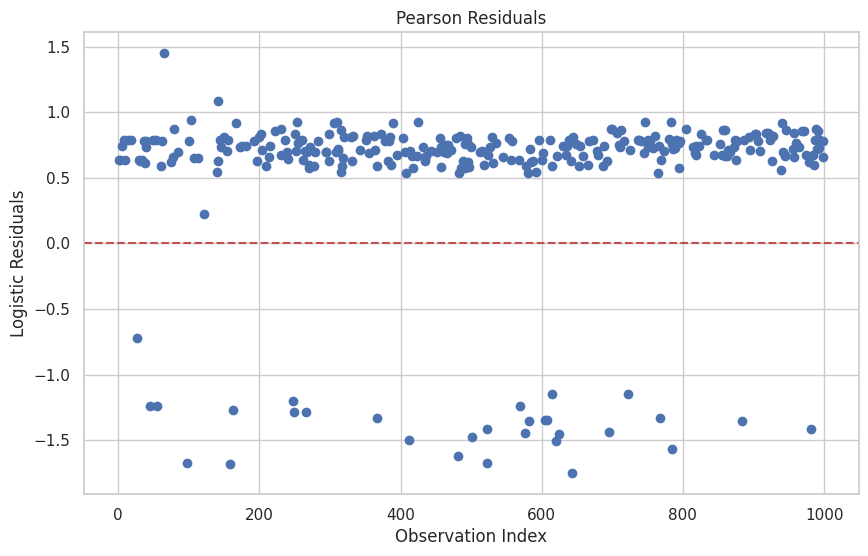

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm # Import statsmodels

# Assuming 'result' is your OptimizeResult object and 'result.x' contains the optimized parameters
# Assuming you used statsmodels for logistic regression
# Create a new Logit model instance with the optimized parameters
fitted_model = sm.Logit(y_train, X_train) # Create Logit model instance

# Apply regularization with a small alpha value to address multicollinearity
# Replace 'alpha=0.01' with a suitable value for your data
fitted_model = fitted_model.fit_regularized(method='l1', alpha=0.01)

# Now you can access predict method using fitted_model
pearson_resid = (y_test - fitted_model.predict(X_test)) / np.sqrt(fitted_model.predict(X_test) * (1 - fitted_model.predict(X_test)))

# Plot only the Pearson residuals
plt.figure(figsize=(10, 6))
plt.plot(pearson_resid, 'o')  # Plot Pearson residuals as points
plt.xlabel("Observation Index")
plt.ylabel("Logistic Residuals")
plt.title("Pearson Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.show()

In [ ]:
# 4. Deviance Residuals
deviance_resid = result.resid_dev
print(f"Deviance residuals: \n{deviance_resid[:10]}")  # Printing first 10 residuals

Deviance residuals: 
0    0.533170
1    0.415434
2    0.448309
3    0.294608
4    0.494753
5    0.619233
6   -0.691900
7    0.555940
8    0.582631
9    0.400704
dtype: float64


Optimization terminated successfully.
         Current function value: 0.327054
         Iterations 7
Deviance residuals: 
105    0.318575
68     0.458264
479    0.405329
399    0.410528
434    0.416385
258    0.387243
827    0.475237
884    0.592053
304    0.437150
811    0.570332
dtype: float64


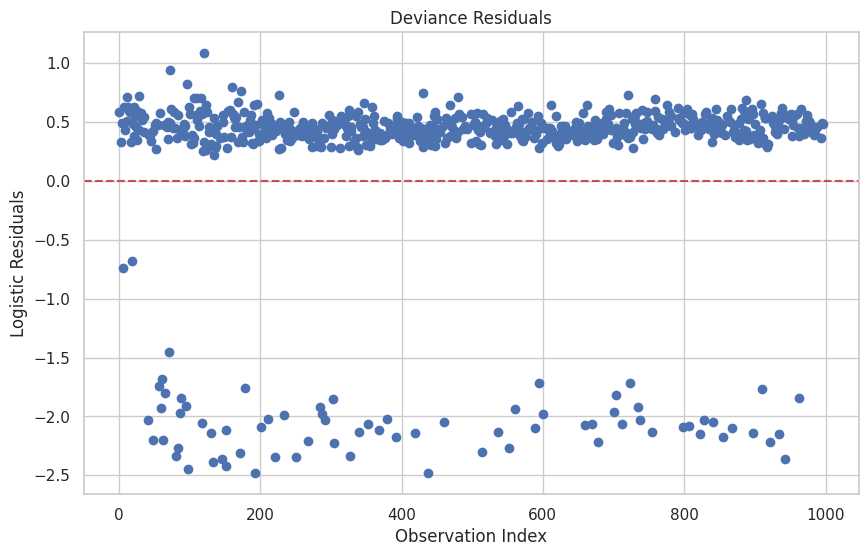

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# ... (Previous code for model fitting and residual calculation) ...

# Assuming 'result' is your OptimizeResult object and 'result.x' contains the optimized parameters
# Assuming you used statsmodels for logistic regression
# Create a new Logit model instance with the optimized parameters
fitted_model = sm.Logit(y_train, X_train) # Create Logit model instance

# Fit the model
fitted_model = fitted_model.fit() # Fit the model using MLE instead of regularization

# 4. Deviance Residuals
# Access the deviance residuals from the fitted model object, not the optimization result
deviance_resid = fitted_model.resid_dev
print(f"Deviance residuals: \n{deviance_resid[:10]}")  # Printing first 10 residuals

# Plot Deviance Residuals
plt.figure(figsize=(10, 6))
plt.plot(deviance_resid, 'o')  # Plot deviance residuals as points
plt.xlabel("Observation Index")
plt.ylabel("Logistic Residuals")
plt.title("Deviance Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculate Pearson residuals
pearson_resid = (y_test - result.predict(X_test)) / np.sqrt(result.predict(X_test) * (1 - result.predict(X_test)))

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(result.predict(X_test), pearson_resid)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Pearson Residuals")
plt.title("Residuals vs. Fitted Values")
plt.grid(True)
plt.show()

In [ ]:
# 5. Wald Statistic
wald_stats = (result.params / result.bse) ** 2
print(f"Wald statistics: \n{wald_stats}")

Wald statistics: 
const       9.848235e-07
Gender      2.196168e-01
ParentED    4.444641e+00
Resident    1.950912e+00
B1          1.760962e+00
B2          1.359992e-06
B3          3.104787e-02
B4          4.759556e-03
B5          2.394527e+00
B6          2.168491e+00
B7          1.102908e+00
B8          2.158788e-02
B9          1.997240e-01
B10         1.292009e-01
B11         1.359437e+00
dtype: float64


In [ ]:
# 6. Linearity Test (for continuous variables)
# Let's assume continuous variables are 'B1', 'B2', ..., 'B11'
continuous_vars = ['Gender', 'ParentED', 'Resident','B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
for var in continuous_vars:
    X_train_with_const = sm.add_constant(X_train) # Add constant outside the loop to avoid repeatedly adding it
    logit = sm.Logit(y_train, X_train_with_const[[var, 'const']]) # Use the constant when fitting the model
    try:
        result = logit.fit(disp=0) # Suppress convergence messages
        print(f'Wald statistic for linearity test (feature: {var}): {result.tvalues[var]:.4f}')
    except np.linalg.LinAlgError:
        print(f'LinAlgError encountered for feature: {var}. Check for low variance or perfect correlation.')

Wald statistic for linearity test (feature: Gender): 0.1332
Wald statistic for linearity test (feature: ParentED): 2.0707
Wald statistic for linearity test (feature: Resident): 1.3716
Wald statistic for linearity test (feature: B1): 0.6827
LinAlgError encountered for feature: B2. Check for low variance or perfect correlation.
Wald statistic for linearity test (feature: B3): 0.8158
Wald statistic for linearity test (feature: B4): -1.0644
Wald statistic for linearity test (feature: B5): 2.3062
Wald statistic for linearity test (feature: B6): 2.2167
Wald statistic for linearity test (feature: B7): 0.9767
Wald statistic for linearity test (feature: B8): 1.1373
Wald statistic for linearity test (feature: B9): 0.4890
Wald statistic for linearity test (feature: B10): 0.3639
Wald statistic for linearity test (feature: B11): 1.2208


In [ ]:
# Variance Inflation Factor (VIF) for multicollinearity check
!pip install statsmodels
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor # Import the function

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    Variable          VIF
0      const  1481.016804
1     Gender     1.015265
2   ParentED     1.025961
3   Resident     1.041407
4         B1     1.030966
5         B2     1.024961
6         B3     1.049578
7         B4     1.063383
8         B5     1.139089
9         B6     1.130627
10        B7     1.045251
11        B8     1.045201
12        B9     1.023892
13       B10     1.036568
14       B11     1.040741


In [ ]:
#Maximum Likelihood
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.326265
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    B12   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      985
Method:                           MLE   Df Model:                           14
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                 0.02878
Time:                        12:43:17   Log-Likelihood:                -326.27
converged:                      False   LL-Null:                       -335.93
Covariance Type:            nonrobust   LLR p-value:                    0.1526
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0297   1.41e+04      0.001      0.999   -2.77e+04    2.77e+04
Gender         0.1016      0.217      0.469      0.639      -0.32

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#Variable Selection (e.g., using Recursive Feature Elimination)
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=5)  # Select top 5 features
rfe = rfe.fit(X, y)

print("Selected Features:")
print(rfe.support_)
print("Feature Ranking:")
print(rfe.ranking_)

Selected Features:
[False False False  True  True False False False  True  True  True False
 False False False]
Feature Ranking:
[11  5  2  1  1  7  8 10  1  1  1  9  4  6  3]


In [ ]:
#Bayesian Estimation (using MCMC for logistic regression)
#Bayesian Estimation (using statsmodels for approximation)
import statsmodels.api as sm
import numpy as np
import scipy.optimize as optimize

# Define the logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Define the log-likelihood function with prior
def log_likelihood(params, X, y):
    intercept, betas = params[0], params[1:]
    mu = intercept + np.dot(X, betas)
    theta = logistic(mu)

    # Likelihood
    likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))

    # Prior (example: Gaussian priors on coefficients)
    prior = -0.5 * np.sum(betas**2)  # Adjust prior as needed

    return -(likelihood + prior)  # Negative for minimization


# Initial guess for parameters
initial_params = np.zeros(X.shape[1] + 1)

# Optimization to find posterior mode
result = optimize.minimize(log_likelihood, initial_params, args=(X, y))

# Extract estimated parameters
intercept_hat, betas_hat = result.x[0], result.x[1:]

# Print estimated parameters
print("Intercept:", intercept_hat)
print("Coefficients:", betas_hat)

Intercept: -0.9795098274984464
Coefficients: [ 1.95264179e-06  7.33610422e-02  2.35997537e-01  2.78347736e-01
  2.95882383e-01 -6.48342127e-02  4.09702678e-02 -2.10370548e-02
  8.70504734e-01  8.92389814e-01  2.37722520e-01  3.07513356e-02
  1.12638369e-01 -5.86681846e-02  2.16963454e-01]


In [ ]:
#Bayesian Estimation (using statsmodels for approximation)
import statsmodels.api as sm
import numpy as np
import scipy.optimize as optimize

# Define the logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Define the log-likelihood function with prior
def log_likelihood(params, X, y):
    intercept, betas = params[0], params[1:]
    mu = intercept + np.dot(X, betas)
    theta = logistic(mu)

    # Likelihood
    likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))

    # Prior (example: Gaussian priors on coefficients)
    prior = -0.5 * np.sum(betas**2)  # Adjust prior as needed

    return -(likelihood + prior)  # Negative for minimization


# Initial guess for parameters
initial_params = np.zeros(X.shape[1] + 1)

# Optimization to find posterior mode
result = optimize.minimize(log_likelihood, initial_params, args=(X, y))

# Extract estimated parameters
intercept_hat, betas_hat = result.x[0], result.x[1:]

# Print estimated parameters
print("Intercept:", intercept_hat)
print("Coefficients:", betas_hat)

# --- Instead of pymc3 summary, print the results directly ---
print("\nApproximated Posterior Mode (using statsmodels):")
for i, name in enumerate(['Intercept'] + list(X.columns)):
    print(f"{name}: {result.x[i]:.4f}")

Intercept: -0.9795098274984464
Coefficients: [ 1.95264179e-06  7.33610422e-02  2.35997537e-01  2.78347736e-01
  2.95882383e-01 -6.48342127e-02  4.09702678e-02 -2.10370548e-02
  8.70504734e-01  8.92389814e-01  2.37722520e-01  3.07513356e-02
  1.12638369e-01 -5.86681846e-02  2.16963454e-01]

Approximated Posterior Mode (using statsmodels):
Intercept: -0.9795
const: 0.0000
Gender: 0.0734
ParentED: 0.2360
Resident: 0.2783
B1: 0.2959
B2: -0.0648
B3: 0.0410
B4: -0.0210
B5: 0.8705
B6: 0.8924
B7: 0.2377
B8: 0.0308
B9: 0.1126
B10: -0.0587
B11: 0.2170


In [ ]:
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats

# Define the logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Define the log-likelihood function with prior
def log_likelihood(params, X, y):
    intercept, betas = params[0], params[1:]
    mu = intercept + np.dot(X, betas)
    theta = logistic(mu)

    # Likelihood
    likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))

    # Prior (example: Gaussian priors on coefficients)
    prior = -0.5 * np.sum(betas**2)  # Adjust prior as needed

    return -(likelihood + prior)  # Negative for minimization

# Initial guess for parameters
initial_params = np.zeros(X.shape[1] + 1)

# --- MCMC Gibbs Sampling ---
def gibbs_sampler(X, y, initial_params, n_iter=10000, burn_in=1000):
    n_params = len(initial_params)
    samples = np.zeros((n_iter, n_params))
    current_params = initial_params.copy()

    for i in range(n_iter):
        for j in range(n_params):
            # Proposal distribution (adjust scale as needed)
            proposal = stats.norm.rvs(loc=current_params[j], scale=0.1)

            # Proposed parameters
            proposed_params = current_params.copy()
            proposed_params[j] = proposal

            # Acceptance probability
            log_prob_current = log_likelihood(current_params, X, y)
            log_prob_proposed = log_likelihood(proposed_params, X, y)
            acceptance_prob = np.exp(log_prob_proposed - log_prob_current)

            # Accept or reject proposal
            if np.random.rand() < acceptance_prob:
                current_params = proposed_params.copy()

        samples[i] = current_params

    # Apply burn-in
    samples = samples[burn_in:]

    return samples

# Run Gibbs sampler
samples = gibbs_sampler(X, y, initial_params)

# --- Analyze Samples ---
# Calculate posterior means
posterior_means = samples.mean(axis=0)

# Print results
print("\nApproximated Posterior Means (using Gibbs Sampling):")
for i, name in enumerate(['Intercept'] + list(X.columns)):
    print(f"{name}: {posterior_means[i]:.4f}")

Streaming output truncated to the last 5000 lines.
<ipython-input-38-a0852ad6cfe1>:16: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))
<ipython-input-38-a0852ad6cfe1>:44: RuntimeWarning: invalid value encountered in scalar subtract
  acceptance_prob = np.exp(log_prob_proposed - log_prob_current)
<ipython-input-38-a0852ad6cfe1>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-38-a0852ad6cfe1>:16: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))
<ipython-input-38-a0852ad6cfe1>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-38-a0852ad6cfe1>:16: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))
<ipython-input-38-a0852ad6cfe1>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + n


Approximated Posterior Means (using Gibbs Sampling):
Intercept: -27.1857
const: -29.8041
Gender: -29.4550
ParentED: -28.0800
Resident: -26.8767
B1: -26.7334
B2: -28.5324
B3: -27.9741
B4: -27.5312
B5: -30.1312
B6: -28.0436
B7: -29.1977
B8: -25.3413
B9: -25.1194
B10: -29.4530
B11: -30.1129


<ipython-input-38-a0852ad6cfe1>:44: RuntimeWarning: invalid value encountered in scalar subtract
  acceptance_prob = np.exp(log_prob_proposed - log_prob_current)
<ipython-input-38-a0852ad6cfe1>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-38-a0852ad6cfe1>:16: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))
<ipython-input-38-a0852ad6cfe1>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-38-a0852ad6cfe1>:16: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))
<ipython-input-38-a0852ad6cfe1>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-38-a0852ad6cfe1>:16: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))
<ipython-input-38-a0852ad6cfe1>:44: Runt

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, cohen_kappa_score
import numpy as np

# Get the classification report (includes precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix: to compute specificity, NPV
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Recall (Sensitivity or True Positive Rate)
recall = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Precision (Positive Predictive Value)
precision = tp / (tp + fp)

# Negative Predictive Value (NPV)
npv = tn / (tn + fn)

# F1-Score (Harmonic mean of precision and recall)
f1_score = 2 * (precision * recall) / (precision + recall)

# Cohen's Kappa (Agreement between actual and predicted)
kappa = cohen_kappa_score(y_test, y_pred)

# ROC AUC (Area under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the calculated metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Negative Predictive Value (NPV): {npv:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"Cohen's Kappa: {kappa:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# ROC Curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
import arviz as az

# Initial setup and data loading
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data = pd.read_excel('Patrick Sheet.Dataa.xlsx', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

# Define features and target
cols = ['Gender', 'ParentED', 'Resident', 'B1', 'B2', 'B3', 'B4',
        'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
X = data[cols]
y = data['B12']

# Standardize features
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Frequentist Logistic Regression
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Bayesian Logistic Regression
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Define and fit Bayesian model
with pm.Model() as model:
    # Prior distributions
    intercept = pm.Normal('intercept', mu=0, sd=10)
    betas = pm.Normal('betas', mu=0, sd=10, shape=X.shape[1])

    # Model specification
    mu = intercept + pm.math.dot(X_scaled, betas)
    theta = pm.Deterministic('theta', logistic(mu))

    # Likelihood
    y_obs = pm.Bernoulli('y_obs', p=theta, observed=y)

    # Inference - MCMC
    # Using NUTS (No U-Turn Sampler) which is an extension of Hamiltonian Monte Carlo
    trace = pm.sample(2000, tune=1000, return_inferencedata=False)

# Print summary of posterior distributions
print(pm.summary(trace, var_names=['intercept', 'betas']))

# Convergence Diagnostics
# Plot trace and posterior distributions
pm.plot_trace(trace)
plt.show()

# Calculate Gelman-Rubin statistic
gelman_rubin = pm.diagnostics.gelman_rubin(trace)
print("\nGelman-Rubin Statistics:")
print(gelman_rubin)

# Effective sample size
effective_n = pm.diagnostics.effective_n(trace)
print("\nEffective Sample Size:")
print(effective_n)

# Posterior Predictive Check
with model:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)

# Plot posterior predictive check
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ppc['y_obs'].mean(axis=1), bins=19, alpha=0.5)
ax.axvline(y.mean(), color='r', linestyle='--')
ax.set(xlabel='mean(y)', ylabel='Frequency')
plt.show()

# Calculate posterior probabilities for test set
def predict_proba(X_new, trace):
    """Calculate posterior predictive probabilities"""
    X_new_scaled = scaler.transform(X_new)
    post_preds = []
    for i in range(len(trace['intercept'])):
        beta0 = trace['intercept'][i]
        betas = trace['betas'][i]
        preds = logistic(beta0 + np.dot(X_new_scaled, betas))
        post_preds.append(preds)
    return np.array(post_preds)

# Get predictions for test set
post_pred_probs = predict_proba(X_test, trace)
y_pred_bayes = (post_pred_probs.mean(axis=0) > 0.5).astype(int)

# Calculate accuracy
bayes_accuracy = (y_pred_bayes == y_test).mean()
print(f"\nBayesian Model Test Accuracy: {bayes_accuracy:.3f}")

# Compute and plot credible intervals for parameters
def plot_coefficient_posterior(trace, feature_names):
    """Plot posterior distributions of coefficients with 95% credible intervals"""
    n_features = len(feature_names)

    # Calculate mean and credible intervals
    means = np.mean(trace['betas'], axis=0)
    ci_lower = np.percentile(trace['betas'], 2.5, axis=0)
    ci_upper = np.percentile(trace['betas'], 97.5, axis=0)

    # Create plot
    plt.figure(figsize=(12, 8))
    plt.errorbar(means, range(n_features),
                xerr=np.vstack([means - ci_lower, ci_upper - means]),
                fmt='o', capsize=5)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.yticks(range(n_features), feature_names)
    plt.xlabel('Coefficient Value')
    plt.title('Posterior Distributions of Coefficients\nwith 95% Credible Intervals')
    plt.tight_layout()
    plt.show()

# Plot coefficient posteriors
plot_coefficient_posterior(trace, cols)

# Compare with frequentist results
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_freq = logreg.predict(X_test)
freq_accuracy = (y_pred_freq == y_test).mean()
print(f"Frequentist Model Test Accuracy: {freq_accuracy:.3f}")

# Cross-validation
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_excel('Patrick Sheet.Dataa.xlsx', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

cols = ['Gender', 'ParentED', 'Resident', 'B1', 'B2', 'B3', 'B4',
        'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
X = data[cols]
y = data['B12']

# Add a constant term for the intercept
X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())
``")


In this modified code:


*   `sm.add_constant(X)` adds a constant term to the independent variables `X`.
*   The intercept will now be included in the summary output, labeled as `const`.
*   The corresponding p-value for the intercept will also be displayed.


The output will show the intercept and its p-value, along with the coefficients and p-values for the other variables.


Example output:



SyntaxError: unterminated string literal (detected at line 31) (<ipython-input-36-c09d985c5d18>, line 31)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2  # Import chi2 for p-value calculation

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_excel('Patrick Sheet.Dataa.xlsx', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

cols = ['Gender', 'ParentED', 'Resident', 'B1', 'B2', 'B3', 'B4',
        'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
X = data[cols]
y = data['B12']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the full model
X_full = X  # All features
logit_model_full = sm.Logit(y, X_full)
result_full = logit_model_full.fit() # Assign result to result_full

# Define the reduced model (example: removing 'Gender' and 'ParentED')
X_reduced = X[['const', 'Resident', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']]
logit_model_reduced = sm.Logit(y, X_reduced)
result_reduced = logit_model_reduced.fit() # Assign result to result_reduced


# Likelihood Ratio Test
logLF = result_full.llf
logLR = result_reduced.llf
LRT = 2 * (logLF - logLR)
df = X_full.shape[1] - X_reduced.shape[1]  # Degrees of freedom

p_value = 1 - chi2.cdf(LRT, df)
print("\nLikelihood Ratio Test Results:")
print(f"LRT Statistic: {LRT:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The model fits the data adequately.")
else:
    print("The model does not fit the data adequately.")

print(result_full.summary())

(1000, 18)
['Age', 'Gender', 'Grade', 'ParentED', 'ParentOc', 'Resident', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']
         Current function value: 0.326265
         Iterations: 35
         Current function value: 0.328604
         Iterations: 35

Likelihood Ratio Test Results:

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



LRT Statistic: 4.6762
Degrees of Freedom: 2
P-value: 0.0965
The model does not fit the data adequately.
                           Logit Regression Results                           
Dep. Variable:                    B12   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      985
Method:                           MLE   Df Model:                           14
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                 0.02878
Time:                        20:58:32   Log-Likelihood:                -326.27
converged:                      False   LL-Null:                       -335.93
Covariance Type:            nonrobust   LLR p-value:                    0.1526
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0297   1.41e+04      0.001      0.999   -2.77e+04    2.77e+04
Gender         0.1016     

In [ ]:
from itertools import combinations # Import the combinations function
# Function to calculate AIC
def calculate_aic(X, y):
    X = sm.add_constant(X)
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()
    k = X.shape[1]  # Number of parameters
    logL = result.llf  # Log-likelihood
    aic = 2 * k - 2 * logL
    return aic


# Initialize best model and AIC
best_aic = float('inf')
best_model = None


# Iterate over all possible combinations of variables
for r in range(1, len(cols) + 1):
    for combination in combinations(cols, r):
        X_subset = data[list(combination)]
        aic = calculate_aic(X_subset, y)

        # Print AIC for each model
        print(f"Variables: {combination}, AIC: {aic:.4f}")

        # Update best model if AIC is lower
        if aic < best_aic:
            best_aic = aic
            best_model = combination


print(f"\nBest Model: {best_model}, AIC: {best_aic:.4f}")


# Refit the best model
X_best = sm.add_constant(data[list(best_model)])
logit_model_best = sm.Logit(y, X_best)
result_best = logit_model_best.fit()
print(result_best.summary())


# Likelihood Ratio Test
X_full = sm.add_constant(X)
logit_model_full = sm.Logit(y, X_full)
result_full = logit_model_full.fit()

logLF = result_full.llf
logLR = result_best.llf
LRT = 2 * (logLF - logLR)
df = X_full.shape[1] - X_best.shape[1]  # Degrees of freedom


p_value = 1 - chi2.cdf(LRT, df)
print("\nLikelihood Ratio Test Results:")
print(f"LRT Statistic: {LRT:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The reduced model fits the data adequately.")
else:
    print("The reduced model does not fit the data adequately.")

Optimization terminated successfully.
         Current function value: 0.335922
         Iterations 6
Variables: ('Gender',), AIC: 675.8435
Optimization terminated successfully.
         Current function value: 0.333584
         Iterations 6
Variables: ('ParentED',), AIC: 671.1680
Optimization terminated successfully.
         Current function value: 0.335138
         Iterations 6
Variables: ('Resident',), AIC: 674.2756
Optimization terminated successfully.
         Current function value: 0.334695
         Iterations 6
Variables: ('B1',), AIC: 673.3897
         Current function value: 0.335821
         Iterations: 35
Variables: ('B2',), AIC: 675.6424
Optimization terminated successfully.
         Current function value: 0.335906
         Iterations 6
Variables: ('B3',), AIC: 675.8125
Optimization terminated successfully.
         Current function value: 0.335932
         Iterations 6
Variables: ('B4',), AIC: 675.8630
Optimization terminated successfully.
         Current function valu

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Optimization terminated successfully.
         Current function value: 0.335862
         Iterations 6
Variables: ('B10',), AIC: 675.7238
Optimization terminated successfully.
         Current function value: 0.335276
         Iterations 6
Variables: ('B11',), AIC: 674.5527
Optimization terminated successfully.
         Current function value: 0.333577
         Iterations 6
Variables: ('Gender', 'ParentED'), AIC: 673.1534
Optimization terminated successfully.
         Current function value: 0.335121
         Iterations 6
Variables: ('Gender', 'Resident'), AIC: 676.2427
Optimization terminated successfully.
         Current function value: 0.334679
         Iterations 6
Variables: ('Gender', 'B1'), AIC: 675.3573
         Current function value: 0.335813
         Iterations: 35
Variables: ('Gender', 'B2'), AIC: 677.6252
Optimization terminated successfully.
         Current function value: 0.335896
         Iterations 6
Variables: ('Gender', 'B3'), AIC: 677.7921
Optimization terminated 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.332694
         Iterations 6
Variables: ('ParentED', 'B11'), AIC: 671.3883
Optimization terminated successfully.
         Current function value: 0.333729
         Iterations 6
Variables: ('Resident', 'B1'), AIC: 673.4585
         Current function value: 0.335045
         Iterations: 35
Variables: ('Resident', 'B2'), AIC: 676.0892
Optimization terminated successfully.
         Current function value: 0.335092
         Iterations 6
Variables: ('Resident', 'B3'), AIC: 676.1845
Optimization terminated successfully.
         Current function value: 0.335126
         Iterations 6
Variables: ('Resident', 'B4'), AIC: 676.2512
Optimization terminated successfully.
         Current function value: 0.332061
         Iterations 6
Variables: ('Resident', 'B5'), AIC: 670.1214
Optimization terminated successfully.
         Current function value: 0.332643
         Iterations 6
Variables: ('Resident', 'B6'), AIC: 671.2861
Optimi

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.334608
         Iterations 6
Variables: ('B1', 'B10'), AIC: 675.2153
Optimization terminated successfully.
         Current function value: 0.334061
         Iterations 6
Variables: ('B1', 'B11'), AIC: 674.1219
         Current function value: 0.335798
         Iterations: 35
Variables: ('B2', 'B3'), AIC: 677.5960
         Current function value: 0.335821
         Iterations: 35
Variables: ('B2', 'B4'), AIC: 677.6419
         Current function value: 0.333099
         Iterations: 35
Variables: ('B2', 'B5'), AIC: 672.1978
         Current function value: 0.333519
         Iterations: 35
Variables: ('B2', 'B6'), AIC: 673.0382
         Current function value: 0.335087
         Iterations: 35
Variables: ('B2', 'B7'), AIC: 676.1746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Optimization terminated successfully.
         Current function value: 0.335772
         Iterations 33


LinAlgError: Singular matrix

In [ ]:
!pip install statsmodels
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2
from itertools import combinations

# ... (rest of your code) ...

# Function to calculate AIC with singularity handling
def calculate_aic(X, y):
    X = sm.add_constant(X)
    logit_model = sm.Logit(y, X)
    try:
        result = logit_model.fit(disp=0)  # Suppress convergence warnings
        k = X.shape[1]
        logL = result.llf
        aic = 2 * k - 2 * logL
        return aic
    except np.linalg.LinAlgError:
        # Handle singularity by returning a very high AIC
        # This penalizes models with singular matrices
        return float('inf')

# ... (rest of your code, including the AIC calculation loop) ...

In [ ]:
from itertools import combinations # Import the combinations function
# Function to calculate AIC
def calculate_aic(X, y):
    X = sm.add_constant(X)
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()
    k = X.shape[1]  # Number of parameters
    logL = result.llf  # Log-likelihood
    aic = 2 * k - 2 * logL
    return aic


# Initialize best model and AIC
best_aic = float('inf')
best_model = None


# Iterate over all possible combinations of variables
for r in range(1, len(cols) + 1):
    for combination in combinations(cols, r):
        X_subset = data[list(combination)]
        aic = calculate_aic(X_subset, y)

        # Print AIC for each model
        print(f"Variables: {combination}, AIC: {aic:.4f}")

        # Update best model if AIC is lower
        if aic < best_aic:
            best_aic = aic
            best_model = combination


print(f"\nBest Model: {best_model}, AIC: {best_aic:.4f}")


# Refit the best model
X_best = sm.add_constant(data[list(best_model)])
logit_model_best = sm.Logit(y, X_best)
result_best = logit_model_best.fit()
print(result_best.summary())


# Likelihood Ratio Test
X_full = sm.add_constant(X)
logit_model_full = sm.Logit(y, X_full)
result_full = logit_model_full.fit()

logLF = result_full.llf
logLR = result_best.llf
LRT = 2 * (logLF - logLR)
df = X_full.shape[1] - X_best.shape[1]  # Degrees of freedom


p_value = 1 - chi2.cdf(LRT, df)
print("\nLikelihood Ratio Test Results:")
print(f"LRT Statistic: {LRT:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The reduced model fits the data adequately.")
else:
    print("The reduced model does not fit the data adequately.")